In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pygam import LinearGAM, s, f
import matplotlib.pyplot as plt
sns.set()

# DoWhy

In [4]:
import numpy as np
import pandas as pd

import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets

In [5]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000,
        treatment_is_binary=True)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

    Z0        Z1        X0        X1        X2        X3        X4    v  \
0  0.0  0.620942 -0.994412  0.385810 -1.824071 -0.786063 -0.398200  0.0   
1  0.0  0.133650  0.290791 -0.386123  0.407225 -0.103473 -0.739396  0.0   
2  0.0  0.487434  1.420378 -0.892673 -2.364671 -0.790584 -0.559511  1.0   
3  1.0  0.526514 -1.141279  0.738093 -0.917068  1.650638 -2.525682  1.0   
4  1.0  0.310638  1.596009 -0.937669 -0.029104 -0.082109 -1.533091  1.0   

           y  
0 -10.098346  
1   1.734578  
2   2.254751  
3   4.322337  
4  12.179569  
digraph { v ->y; U[label="Unobserved Confounders"]; U->v; U->y;X0-> v; X1-> v; X2-> v; X3-> v; X4-> v;X0-> y; X1-> y; X2-> y; X3-> y; X4-> y;Z0-> v; Z1-> v;}


graph[directed 1node[ id "v" label "v"]node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "v" target "y"]edge[source "Unobserved Confounders" target "v"]edge[source "Unobserved Confounders" target "y"]node[ id "X0" label "X0"] edge[ source "X0" targe

In [6]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

Model to find the causal effect of treatment v on outcome y


In [7]:
model.view_model()

/Users/tanmayee/anaconda/envs/py36/lib/python3.6/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Could not load "/Users/tanmayee/anaconda/envs/py36/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


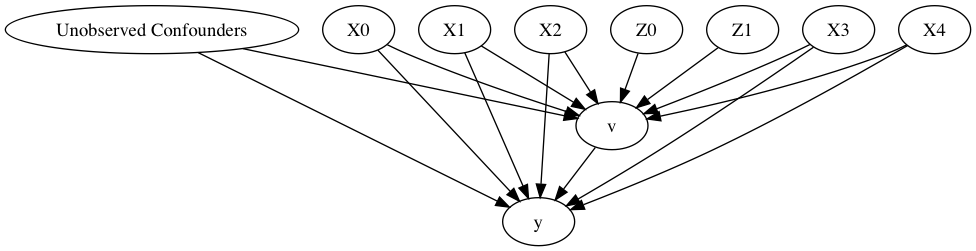

In [8]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [1]:
import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets

Causal graph needs to be specified - we have two options - GML (Graph modelling language) or Dot (Another graph modelling language).

In [2]:
data = dowhy.datasets.linear_dataset(
        beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000,
        treatment_is_binary=True)

In [3]:
data

{'ate': 10,
 'common_causes_names': ['X0', 'X1', 'X2', 'X3', 'X4'],
 'df':        Z0        Z1        X0        X1        X2        X3        X4    v  \
 0     1.0  0.101304 -1.319461  1.150160  0.266957  0.452176 -0.162969  1.0   
 1     0.0  0.201244 -1.714945 -0.864497 -0.536667  0.416195  0.343689  0.0   
 2     1.0  0.144167  0.322807  1.389379 -0.676057  1.304036  2.173330  1.0   
 3     1.0  0.648141  1.432276  0.745049 -0.112032 -0.525821 -0.057007  1.0   
 4     1.0  0.172367  0.001518  1.193958 -0.690643  0.000554  2.395146  1.0   
 5     0.0  0.849435 -0.395955  0.228827  0.261461  1.979822 -1.781980  1.0   
 6     1.0  0.480571 -0.899990  1.146695 -0.917119  1.053379  1.706858  1.0   
 7     0.0  0.154542 -1.068025 -0.184178 -0.322813 -0.764429  2.693672  0.0   
 8     1.0  0.662126 -0.704072 -0.049751  0.476996 -0.498170 -0.083717  1.0   
 9     0.0  0.489770 -0.536649  2.639977  1.718757 -0.047021  0.380294  1.0   
 10    1.0  0.265882 -1.872220 -0.714335  0.960700  0.912

In [3]:
# Create a causal model from the data and given graph.
model=CausalModel(
        data = data["df"],
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["dot_graph"],
        )

# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X3', 'U', 'Z0', 'X0', 'Z1', 'X2', 'X4', 'X1'}


Model to find the causal effect of treatment v on outcome y
{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
There are unobserved common causes. Causal effect cannot be identified.
WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0', 'Z1']


PropensityScoreMatchingEstimator


INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: y~v+X3+Z0+X0+Z1+X2+X4+X1
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: y~v+X3+Z0+X0+Z1+X2+X4+X1+w_random


# Regression
#### Define Graph

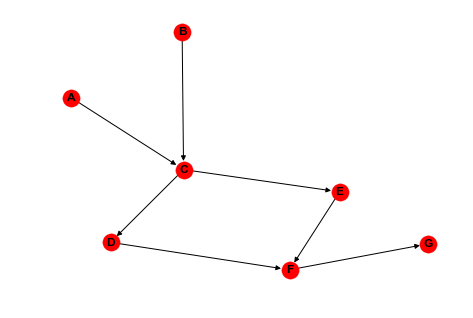

In [183]:
causal_graph = nx.DiGraph()
causal_graph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
causal_graph.add_edges_from([('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'F'), ('C', 'E'), ('E', 'F'), ('F', 'G')])

nx.draw_spring(causal_graph, with_labels=True, font_weight='bold')

#### Define Equations

In [322]:
SAMPLE_SIZE = 1000

A = np.random.normal(3, 0.8, SAMPLE_SIZE)
B = np.random.normal(2, 1, SAMPLE_SIZE)
C = A**3 + B**2 + np.random.normal(0,1, SAMPLE_SIZE)
D = C**3 + np.random.normal(0,1, SAMPLE_SIZE)
E = (C-3)**2 + np.random.normal(0,1, SAMPLE_SIZE)
F = np.abs(D-5)**(0.5) + np.sin(E) + np.random.normal(0,1, SAMPLE_SIZE)
G = 2*(F**2) + np.random.normal(0,1, SAMPLE_SIZE)

#### Fit Models and Check Accuracy

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


Text(0.5,0.92,'Estimating C with Splines')

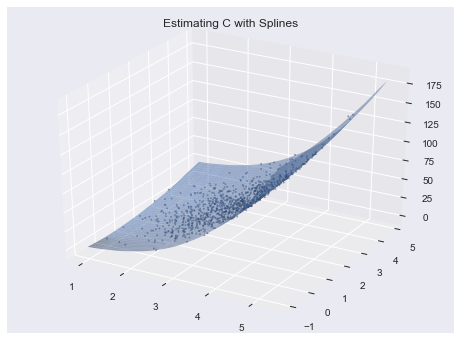

In [323]:
gam_c = LinearGAM(s(0, n_splines=200) + s(1, n_splines=200)).gridsearch(np.hstack((A.reshape(1000, 1), B.reshape(1000, 1))), C)

AA = gam_c.generate_X_grid(term=0, n=100, meshgrid=True)[0]
BB = gam_c.generate_X_grid(term=1, n=100, meshgrid=True)[0]
AA, BB = np.meshgrid(AA, BB)
AA_, BB_ = AA.ravel(), BB.ravel()

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(AA, BB, gam_c.predict(np.vstack([AA_, BB_]).T).reshape((100, 100)), alpha = 0.5)
# ax.plot_surface(AA, BB, gam.prediction_intervals(np.vstack([AA_, BB_]).T, width=.7)[:, 0].reshape((100, 100)), color='b', alpha=0.5)
# ax.plot_surface(AA, BB, gam.prediction_intervals(np.vstack([AA_, BB_]).T, width=.7)[:, 1].reshape((100, 100)), color='b', alpha=0.5)

ax.scatter(A, B, C, edgecolors='none', alpha=0.5, s = 2)
plt.title('Estimating C with Splines')

In [324]:
scores = {'C':(mean_squared_error(C, gam_c.predict(np.vstack([A,B]).T)), mean_absolute_error(C, gam_c.predict(np.vstack([A,B]).T)))}

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


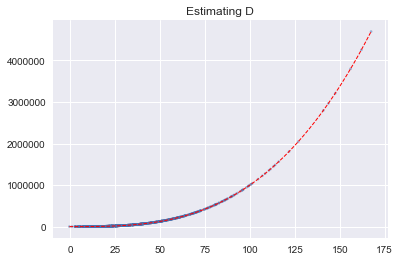

In [325]:
gam_d = LinearGAM(s(0, n_splines=200)).gridsearch(C.reshape(1000, 1), D)
scores['D'] = (mean_squared_error(D, gam_d.predict(C)), mean_absolute_error(D, gam_d.predict(C)))

X, y = C, D

XX = gam_d.generate_X_grid(term=0, n=50)

plt.plot(XX, gam_d.predict(XX), 'r--', linewidth = 1)

plt.scatter(X, y, edgecolors='none', alpha=0.5, s = 7)
plt.title('Estimating D');

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


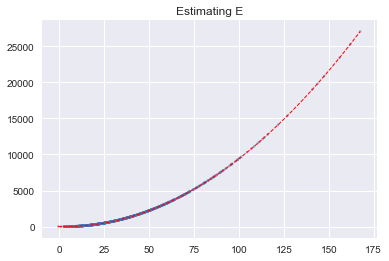

In [326]:
gam_e = LinearGAM(s(0, n_splines=200)).gridsearch(C.reshape(1000, 1), E)
scores['E'] = (mean_squared_error(E, gam_e.predict(C)), mean_absolute_error(E, gam_e.predict(C)))

X, y = C, E

XX = gam_e.generate_X_grid(term=0, n=50)

plt.plot(XX, gam_e.predict(XX), 'r--', linewidth = 1)

plt.scatter(X, y, edgecolors='none', alpha=0.5, s = 7)
plt.title('Estimating E');

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


Text(0.5,0.92,'Estimating F with Splines')

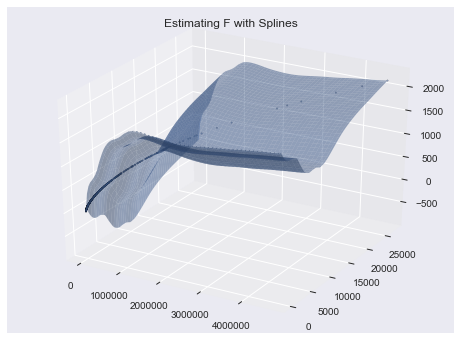

In [327]:
gam_f = LinearGAM(s(0, n_splines=200) + s(1, n_splines=200)).gridsearch(np.hstack((D.reshape(1000, 1), E.reshape(1000, 1))), F)

AA = gam_f.generate_X_grid(term=0, n=100, meshgrid=True)[0]
BB = gam_f.generate_X_grid(term=1, n=100, meshgrid=True)[0]
AA, BB = np.meshgrid(AA, BB)
AA_, BB_ = AA.ravel(), BB.ravel()

scores['F'] = (mean_squared_error(F, gam_f.predict(np.vstack([E, F]).T)), 
               mean_absolute_error(F, gam_f.predict(np.vstack([E, F]).T)))

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(AA, BB, gam_f.predict(np.vstack([AA_, BB_]).T).reshape((100, 100)), alpha = 0.5)
# ax.plot_surface(AA, BB, gam.prediction_intervals(np.vstack([AA_, BB_]).T, width=.7)[:, 0].reshape((100, 100)), color='b', alpha=0.5)
# ax.plot_surface(AA, BB, gam.prediction_intervals(np.vstack([AA_, BB_]).T, width=.7)[:, 1].reshape((100, 100)), color='b', alpha=0.5)

ax.scatter(D, E, F, edgecolors='none', alpha=0.5, s = 2)
plt.title('Estimating F with Splines')

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


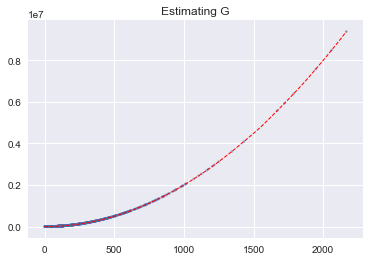

In [328]:
gam_g = LinearGAM(s(0, n_splines=200)).gridsearch(F.reshape(1000, 1), G)
scores['G'] = (mean_squared_error(G, gam_g.predict(F)), mean_absolute_error(G, gam_g.predict(F)))

X, y = F, G

XX = gam_g.generate_X_grid(term=0, n=50)

plt.plot(XX, gam_g.predict(XX), 'r--', linewidth = 1)

plt.scatter(X, y, edgecolors='none', alpha=0.5, s = 7)
plt.title('Estimating G');

In [330]:
scores

{'C': (1.007465147473485, 0.8054454400799298),
 'D': (0.84187241499412158, 0.73238958147710076),
 'E': (0.95703241056655475, 0.79024793317321385),
 'F': (133520.1053106671, 241.6500007008178),
 'G': (0.92817512920165801, 0.76551520291060637)}

In [339]:
# suppose we want to set the value of C to 5

d = gam_d.predict(5)
e = gam_e.predict(5)
f = gam_f.predict(np.array([d, e]).reshape(1, 2))
g = gam_g.predict(f)

print("g = ", g)

g =  [ 196.15689583]
